<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [ ]:
# @title Библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import zipfile
import os
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла.
Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов)

In [ ]:
# Загружаем данные с гугл диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загружаем датасет и выводим размерность датафрейма
data = pd.read_csv('/content/drive/MyDrive/Prod_Py/Копия dst-3.0_16_1_hh_database.csv', sep=';')
data.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [ ]:
# Выводим последние 5 строк датафрейма
data.tail()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице. Какой тип данных имеют все столбцы? Введите его в поле для ответа.

In [15]:
# Выводим основную информацию о числе непустых значений в столбцах и их типах в таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений. Выберите все признаки, в которых есть пропуски в данных:

In [16]:
def check_missing_values(data):
    # Считаем количество пропущенных значений для каждой колонки и сортируем по убыванию
    num_missing = data.isnull().sum().sort_values(ascending=False)
    # Фильтруем колонки, где количество пропущенных значений больше 0
    cols_with_null = num_missing[num_missing > 0]

    if cols_with_null.empty:
        print("Пропущенных значений нет.")
    else:
        print("Количество пропущенных значений по столбцам:")
        print(cols_with_null)

# Находим пропуски
check_missing_values(data)

Количество пропущенных значений по столбцам:
Опыт работы                        168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64


5. Выведите основную статистическую информацию о столбцах. Сколько уникальных значений содержится в столбце «Опыт работы»? Какая из искомых должностей самая распространённая? Введите название.


In [17]:
# Выведим основную информацию о столбцах
data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


In [18]:
# Считаем количество уникальных значений в столбце «Опыт работы»
unique_experience_values = data['Опыт работы'].nunique()
print(f'Количество уникальных значений в столбце «Опыт работы» {unique_experience_values}')

Количество уникальных значений в столбце «Опыт работы» 44413


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [19]:
def get_education_level(x):
    # Разделяем строку
    split_x = x.split(maxsplit=2)
    # Проверяем категории образования по приоритету
    if 'Высшее' in split_x[:2]:
        return 'высшее'
    elif 'Неоконченное' in split_x[:2]:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in ' '.join(split_x[:2]):
        return 'среднее специальное'
    else:
        return 'среднее'

data['Образование'] = data['Образование и ВУЗ'].apply(get_education_level)

# Проверяем уникальные категории
unique_education_categories = data['Образование'].unique()
print(*unique_education_categories, sep='\n')

# Удаляем столбец "Образование и ВУЗ"
data.drop('Образование и ВУЗ', axis=1, inplace=True)

# Считаем количество кандидатов со средним образованием
secondary_education = ((data['Образование'] == 'среднее')).sum()
print(f'Количество кандидатов со средним образованием: {secondary_education}')


неоконченное высшее
высшее
среднее специальное
среднее
Количество кандидатов со средним образованием: 559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина.
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '.
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [20]:
# Разделение столбца "Пол, возраст" и создание новых признаков "Пол" и "Возраст"
def extract_gender_and_age(x):
    parts = x.split(',')
    gender = 'М' if 'Мужчина' in parts[0] else 'Ж'
    age = int(parts[1].split()[0])
    return gender, age

# Применяем функцию и распаковываем результаты в новые столбцы
data[['Пол', 'Возраст']] = data['Пол, возраст'].apply(lambda x: pd.Series(extract_gender_and_age(x)))

# Удаление старого признака "Пол, возраст"
data.drop('Пол, возраст', axis=1, inplace=True)

# Расчет процента женских резюме
percentage_female = (data['Пол'] == 'Ж').mean() * 100

# Расчет среднего возраста соискателей
average_age = data['Возраст'].mean()

# Вывод информации
print(f'Процент женских резюме: {percentage_female:.2f} %')
print(f'Средний возраст соискателей: {average_age:.1f} года')


Процент женских резюме: 19.07 %
Средний возраст соискателей: 32.2 года


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [21]:
# @title Вычисление опыта работы в месяцах
def convert_experience(x):
    if pd.isnull(x) or x == "Не указано":
        return np.nan
    # Очистка строки от текста и извлечение чисел
    years, months = 0, 0
    if 'лет' in x or 'год' in x:
        try:
            years = int(x.split()[2])
        except ValueError:
            years = 0
    if 'месяц' in x:
        try:
            if 'лет' in x or 'год' in x:
                months = int(x.split()[4])
            else:
                months = int(x.split()[2])
        except ValueError:
            months = 0
    total_months = years * 12 + months
    return total_months

# Применяем функцию ко всему столбцу
data['Опыт работы (месяц)'] = data['Опыт работы'].apply(convert_experience)

# Удаление исходного столбца
data.drop('Опыт работы', axis=1, inplace=True)

# Вычисляем медианный опыт работы в месяцах
median_experience = data['Опыт работы (месяц)'].median()

# Выводим результат
median_experience
print(f'Медианный опыт работы (в месяцах): {median_experience}')

Медианный опыт работы (в месяцах): 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , …
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [22]:
# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск',
                  'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь',
                  'Воронеж', 'Волгоград']

# Функциия для определения нового признака Город
def get_city(x):
    city = x.split(',')[0].strip()
    if city in ['Москва', 'Санкт-Петербург']:
        return city
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

# Функция для определения нового признака готовности к переезду
def get_trip(str):
    str = str.split(',')
    for x in str:
        if re.findall(r'ерее', x) == ['ерее']:
            if ('готов' in x or 'хочу' in x) and ('не готов' not in x):
                return True
            else:
                return False

# Функция для определения нового признака готовности к командировкам
def get_business_trip(str):
    if 'командировка' in str:
        if (re.findall(r'не готов к командировкам', str) == ['не готов к командировкам']) \
        or (re.findall(r'не готова к командировкам', str) == ['не готова к командировкам']):
            return False
        else:
            return True
    else:
        return False

# Применение функций
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(get_trip)
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(get_business_trip)
data['Город'] = data['Город, переезд, командировки'].apply(get_city)

# Удаление исходного столбца
data.drop('Город, переезд, командировки', axis=1, inplace=True)

# Расчет процентов
percent_spb = (data['Город'] == 'Санкт-Петербург').mean() * 100
percent_ready_for_both = data[data['Готовность к переезду'] & data['Готовность к командировкам']].shape[0] / data.shape[0] * 100

# Вывод результатов
print(f'Процент соискателей из Санкт-Петербурга: {percent_spb:.0f}%')
print(f'Процент соискателей, готовых к переездам и командировкам: {percent_ready_for_both:.0f}%')

Процент соискателей из Санкт-Петербурга: 11%
Процент соискателей, готовых к переездам и командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [23]:
# Списки категорий
employment_categories = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_categories = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

# Функция для создания бинарных признаков на основе списка категорий
def create_binary_features(df, column, categories):
    for category in categories:
        df[category] = df[column].apply(lambda x: category in x)

# Создание бинарных признаков для "Занятость"
create_binary_features(data, 'Занятость', employment_categories)

# Создание бинарных признаков для "График"
create_binary_features(data, 'График', schedule_categories)

# Находим количество людей, ищущих проектную работу и волонтерство
project_volunteer_count = data[(data['проектная работа']) & (data['волонтерство'])].shape[0]

# Находим количество людей, желающих работать вахтовым методом и с гибким графиком
shift_flexible_count = data[(data['вахтовый метод']) & (data['гибкий график'])].shape[0]

# Удаление исходных столбцов "Занятость" и "График"
data.drop(['Занятость', 'График'], axis=1, inplace=True)

# Вывод результатов
print(f'Количество людей, ищущих проектную работу и волонтерство: {project_volunteer_count}')
print(f'Количество людей, желающих работать вахтовым методом и с гибким графиком: {shift_flexible_count}')

Количество людей, ищущих проектную работу и волонтерство: 436
Количество людей, желающих работать вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**.
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата,
* "proportion" - пропорция,
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования:
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [26]:
# @title Загружаем датасет с курсами валют

# Путь к загруженному zip-архиву
zip_path = '/content/drive/MyDrive/Prod_Py/ExchangeRates.zip'
extract_folder = '/content/drive/MyDrive/Prod_Py'

# Распаковка архива
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Загружаем датасет
exchange_rates = pd.read_csv(f'{extract_folder}/ExchangeRates.csv')
exchange_rates

,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1
2,USD,D,31/12/17,00:00,57.6002,0,1
3,USD,D,01/01/18,00:00,57.6002,0,1
4,USD,D,02/01/18,00:00,57.6002,0,1
...,...,...,...,...,...,...,...
5659,AZN,D,02/12/19,00:00,37.7729,0,1
5660,AZN,D,03/12/19,00:00,37.9662,0,1
5661,AZN,D,04/12/19,00:00,37.8073,0,1
5662,AZN,D,05/12/19,00:00,37.8396,0,1


In [27]:
# Преобразование строковых дат в формат datetime для последующего слияния данных
# и упрощения сравнения дат.
exchange_rates['date'] = pd.to_datetime(exchange_rates['date']).dt.date
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме']).dt.date

# Словарь для конвертации наименований валют из текстовой формы в стандарт ISO,
currency_mapping = {
    'грн': 'UAH',
    'руб': 'RUB',
    'USD': 'USD',
    'EUR': 'EUR',
    'белруб': 'BYN',
    'KGS': 'KGS',
    'сум': 'UZS',
    'AZN': 'AZN',
    'KZT': 'KZT'
}
# Извлечение числового значения зарплаты и её валюты из строки,
# преобразование наименования валюты в соответствующий ISO код для последующей конвертации.
def extract_salary_info(salary_str):
    amount, currency = salary_str.split(' ')[0], salary_str.split(' ')[1].replace('.', '')
    iso_currency = currency_mapping.get(currency, None)
    return pd.Series([float(amount), iso_currency])

data[['ЗП сумма', 'Валюта ISO']] = data['ЗП'].apply(extract_salary_info)

# Слияние таблицы резюме с таблицей курсов валют по дате обновления резюме и коду валюты,
# чтобы преобразовать зарплаты в рубли по актуальному курсу.
merged_df = data.merge(exchange_rates, how='left', left_on=['Обновление резюме', 'Валюта ISO'], right_on=['date', 'currency'])

# Установка курса 1 для рубля, т.к. для него не требуется конвертация.
merged_df.loc[merged_df['Валюта ISO'] == 'RUB', ['close', 'proportion']] = 1, 1

# Конвертация зарплаты из исходной валюты в рубли,
merged_df['ЗП (руб)'] = (merged_df['ЗП сумма'] * merged_df['close']) / merged_df['proportion']

# Удаление временных и ненужных столбцов, а также строк без указания валюты
merged_df = merged_df.dropna(subset=['Валюта ISO'])
resume_data = merged_df.drop(columns=['ЗП', 'ЗП сумма', 'Валюта ISO', 'currency', 'per', 'time', 'vol', 'proportion', 'date', 'close'])

# Расчёт медианной желаемой заработной платы соискателей в тысячах рублей,
median_salary_rub = resume_data['ЗП (руб)'].median() / 1000 # В тысячах рублей
print(f'Медианная заработная плата соискателей в тысячах рублей: {(median_salary_rub)} тыс. руб.')

<ipython-input-27-330368e3155f>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchange_rates['date'] = pd.to_datetime(exchange_rates['date']).dt.date
<ipython-input-27-330368e3155f>:4: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме']).dt.date


Медианная заработная плата соискателей в тысячах рублей: 59.0 тыс. руб.


In [28]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Готовность к переезду            44744 non-null  bool   
 10  Готовность к командировкам       44744 non-null  bool   
 11  Город                            44744 non-null  object 
 12  полная занятость  

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

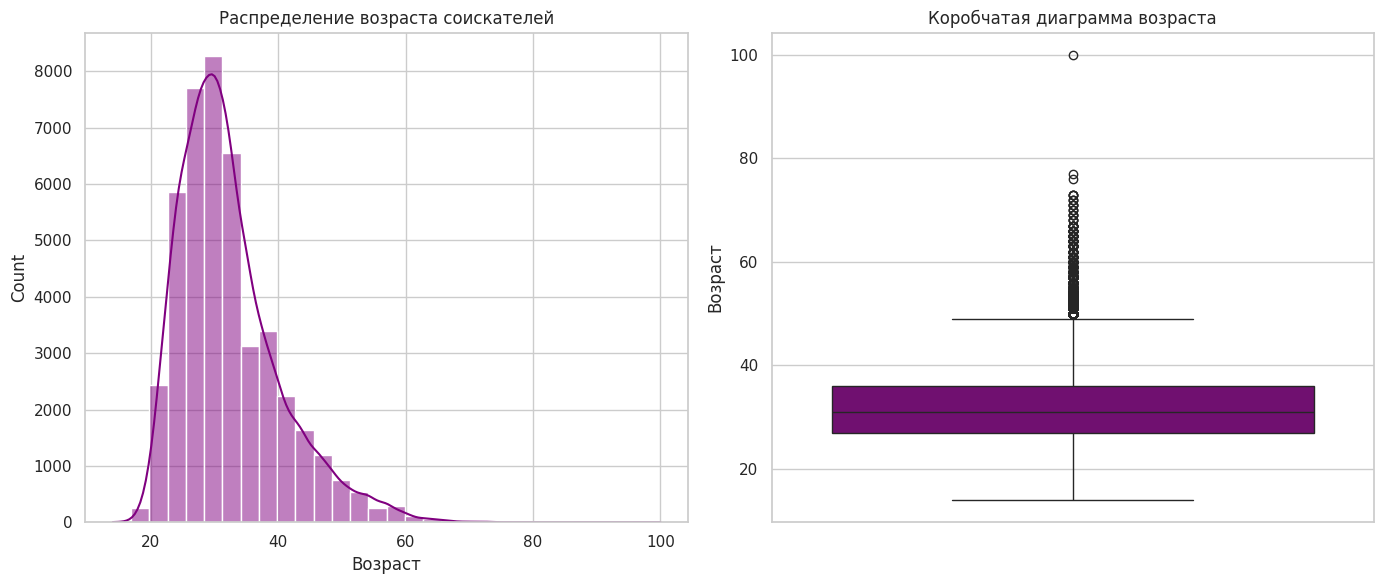


Модальное значение возраста: 30 лет
Минимальный возраст: 14 лет
Максимальный возраст: 100 лет
25-й процентиль (нижняя граница возраста большинства соискателей): 27.0 лет
75-й процентиль (верхняя граница возраста большинства соискателей): 36.0 лет


In [29]:
# Распределение признака "Возраст"
sns.set(style="whitegrid")
# Построим гистограмму распределения возраста
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(resume_data['Возраст'], bins=30, kde=True, color='purple')
plt.title('Распределение возраста соискателей')

# Построим коробчатую диаграмму для возраста
plt.subplot(1, 2, 2)
sns.boxplot(y=resume_data['Возраст'], color='purple')
plt.title('Коробчатая диаграмма возраста')
plt.tight_layout()
plt.show()

# Вычислим модальное значение возраста
age_mode = resume_data['Возраст'].mode()[0]
age_mode

# Вычисление модального значения возраста
age_mode = resume_data['Возраст'].mode()[0]

# Нахождение минимального и максимального значения возраста
age_min = resume_data['Возраст'].min()
age_max = resume_data['Возраст'].max()

# Определение примерного интервала, в котором находится возраст большинства соискателей
# Для этого используем квантили
age_25_quantile = resume_data['Возраст'].quantile(0.25)
age_75_quantile = resume_data['Возраст'].quantile(0.75)

print(f'\nМодальное значение возраста: {age_mode} лет')
print(f'Минимальный возраст: {age_min} лет')
print(f'Максимальный возраст: {age_max} лет')
print(f'25-й процентиль (нижняя граница возраста большинства соискателей): {age_25_quantile} лет')
print(f'75-й процентиль (верхняя граница возраста большинства соискателей): {age_75_quantile} лет')

### Выводы по графику:
Гистограмма возраста соискателей подчёркивает преобладание кандидатов около 30 лет, указывая на моду этого возраста с лёгким смещением в сторону старших возрастных групп. Минимальный возраст в 14 лет и максимальный в 100 лет могут свидетельствовать о данных, требующих проверки на аномалии. Подавляющее большинство кандидатов находятся в диапазоне от 27 до 36 лет, что отражает активность на рынке труда на начальных и средних этапах карьеры. В то же время, наличие значительного количества выбросов, особенно за пределами верхнего квартиля, акцентирует внимание на потенциальных аномалиях в данных.









2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

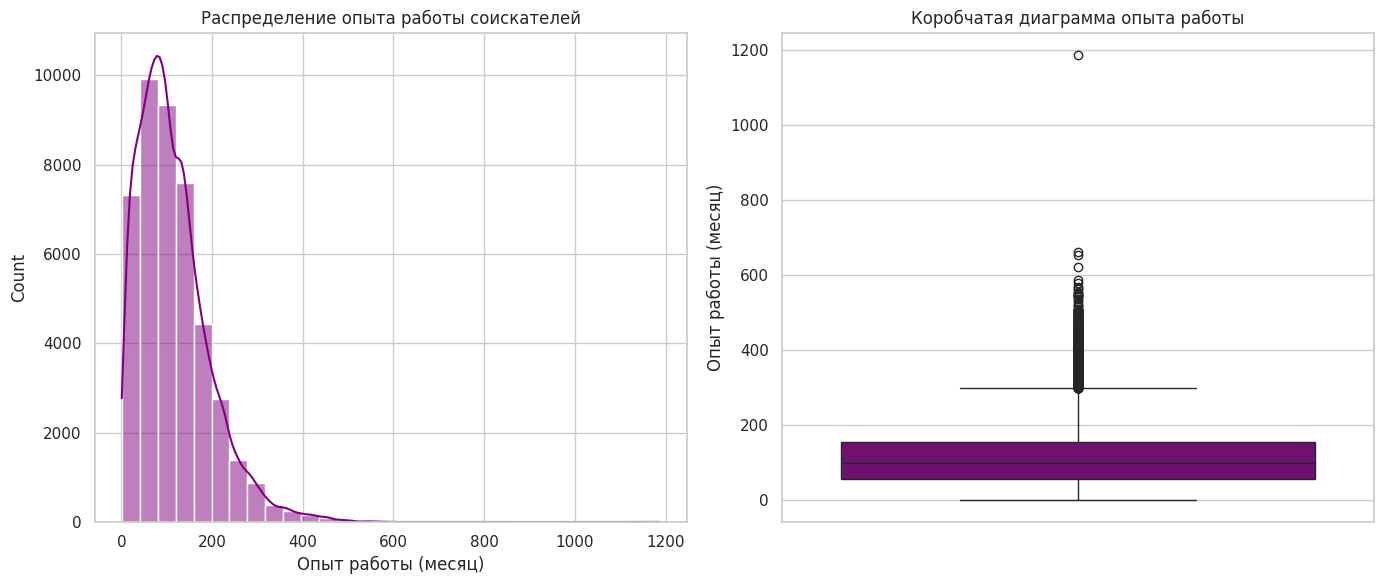


Модальное значение опыта работы: 81.0 месяцев
Минимальный опыт работы: 1.0 месяцев
Максимальный опыт работы: 1188.0 месяцев
25-й процентиль опыта работы (нижняя граница большинства соискателей): 57.0 месяцев
75-й процентиль опыта работы (верхняя граница большинства соискателей): 154.0 месяцев


In [30]:
# Распределение опыта работы (в месяцах)
plt.figure(figsize=(14, 6))

# Гистограмма опыта работы
plt.subplot(1, 2, 1)
sns.histplot(resume_data['Опыт работы (месяц)'].dropna(), bins=30, kde=True, color = 'purple')
plt.title('Распределение опыта работы соискателей')

# Коробчатая диаграмма опыта работы
plt.subplot(1, 2, 2)
sns.boxplot(y=resume_data['Опыт работы (месяц)'].dropna(), color = 'purple')
plt.title('Коробчатая диаграмма опыта работы')
plt.tight_layout()
plt.show()

# Вычисления для ответов на вопросы
exp_mode = resume_data['Опыт работы (месяц)'].mode()[0]
exp_min = resume_data['Опыт работы (месяц)'].min()
exp_max = resume_data['Опыт работы (месяц)'].max()
exp_25_quantile = resume_data['Опыт работы (месяц)'].quantile(0.25)
exp_75_quantile = resume_data['Опыт работы (месяц)'].quantile(0.75)

print(f'\nМодальное значение опыта работы: {exp_mode} месяцев')
print(f'Минимальный опыт работы: {exp_min} месяцев')
print(f'Максимальный опыт работы: {exp_max} месяцев')
print(f'25-й процентиль опыта работы (нижняя граница большинства соискателей): {exp_25_quantile} месяцев')
print(f'75-й процентиль опыта работы (верхняя граница большинства соискателей): {exp_75_quantile} месяцев')



### Выводы:
Гистограмма и коробчатая диаграмма опыта работы соискателей показывают, что большая часть имеет около 7 лет работы, с модальным значением в 81 месяц. Минимальный опыт в 1 месяц соответствует новичкам, в то время как максимальный в 1188 месяцев (99 лет) выделяется как очевидная аномалия. Большинство кандидатов демонстрируют опыт работы в диапазоне от 4.75 до почти 13 лет, что говорит о среднем уровне опыта среди соискателей. Наличие выбросов, превышающих общепринятые значения опыта, подчеркивает потребность в верификации данных для исключения ошибок ввода.


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное
распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


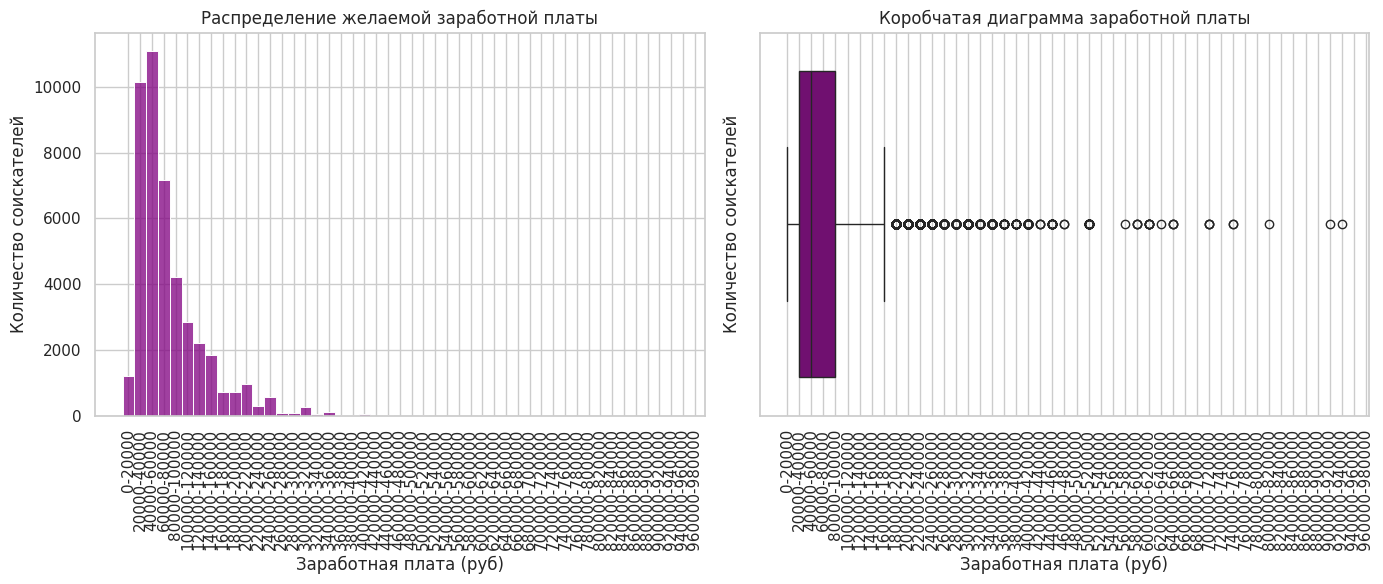


Минимальная желаемая зарплата: 1.0 руб.
Максимальная желаемая зарплата: 24304876.0 руб.
25-й процентиль желаемой зарплаты (нижняя граница большинства соискателей): 37082.2 руб.
75-й процентиль желаемой зарплаты (верхняя граница большинства соискателей): 95000.0 руб.
Количество соискателей с желаемой зарплатой выше 1 миллиона рублей: 5


In [31]:
# Распределение признака "Желаемая заработная плата"
# Создание бинов от 0 до 1 миллиона с шагом в 50000
bins = list(range(0, 1000000 + 20000, 20000))

# Создание меток для бинов
labels = [f"{i}-{i + 20000}" for i in bins[:-1]]  # Для каждого интервала кроме последнего
labels[-1] = f"{bins[-1]}+"  # Последняя метка для всего, что выше последнего бина

# Категоризация зарплат
resume_data['ЗП категория'] = pd.cut(resume_data['ЗП (руб)'], bins=bins, labels=labels, right=False)

# Построение графиков
plt.figure(figsize=(14, 6))

# Гистограмма желаемой заработной платы с заданными бинами
plt.subplot(1, 2, 1)
sns.histplot(resume_data, x='ЗП категория', bins=bins, color='purple')
plt.title('Распределение желаемой заработной платы')
plt.xlabel('Заработная плата (руб)')
plt.xticks(rotation=90)
plt.ylabel('Количество соискателей')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(data=resume_data, x='ЗП категория', color='purple')
plt.title('Коробчатая диаграмма заработной платы')
plt.xlabel('Заработная плата (руб)')
plt.xticks(rotation=90)
plt.ylabel('Количество соискателей')

plt.tight_layout()
plt.show()

# Вычисления для ответов на вопросы
salary_min = resume_data['ЗП (руб)'].min()
salary_max = resume_data['ЗП (руб)'].max()
salary_25_quantile = resume_data['ЗП (руб)'].quantile(0.25)
salary_75_quantile = resume_data['ЗП (руб)'].quantile(0.75)

print(f'\nМинимальная желаемая зарплата: {salary_min} руб.')
print(f'Максимальная желаемая зарплата: {salary_max} руб.')
print(f'25-й процентиль желаемой зарплаты (нижняя граница большинства соискателей): {salary_25_quantile} руб.')
print(f'75-й процентиль желаемой зарплаты (верхняя граница большинства соискателей): {salary_75_quantile} руб.')

# Подсчет количества соискателей с желаемой зарплатой выше 1 миллиона рублей
salary_above_1M = resume_data[resume_data['ЗП (руб)'] > 1e6].shape[0]
print(f'Количество соискателей с желаемой зарплатой выше 1 миллиона рублей: {salary_above_1M}')

### Выводы:
Анализ гистограммы и коробчатой диаграммы желаемой заработной платы соискателей выявил следующее: большая часть кандидатов ожидает зарплату до 100 000 рублей, с наибольшей концентрацией в диапазоне от 20 000 до 40 000 рублей. Распределение показывает убывание числа соискателей с ростом желаемой зарплаты, формируя распределение с правым хвостом. Медианное значение желаемой зарплаты приблизительно составляет 50 000 рублей, с половиной соискателей, ожидающих зарплату между 37 082,2 и 95 000 рублей. Минимальное значение в 1 рубль и максимальное в 24 304 876 рублей подчёркивают наличие аномальных данных. Всего пять соискателей указали желаемую зарплату свыше 1 миллиона рублей, выделяясь как экстремальные случаи среди общего числа кандидатов.








4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

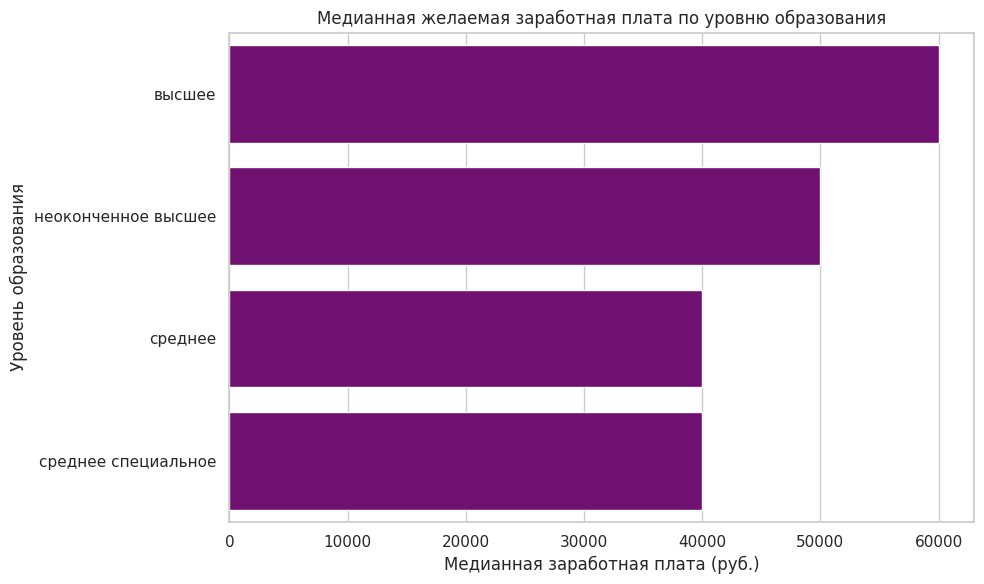

In [32]:
# Зависимость медианной желаемой заработной платы от уровня образования

# Фильтрация данных для желаемой заработной платы меньше 1 млн рублей
filtered_data = resume_data[resume_data['ЗП (руб)'] < 1e6]

# Группировка по уровню образования и расчет медианных значений желаемой заработной платы
median_salary_education = filtered_data.groupby('Образование')['ЗП (руб)'].median().reset_index()

# Сортировка по убыванию медианной заработной платы
median_salary_education_sorted = median_salary_education.sort_values(by='ЗП (руб)', ascending=False)

# Построение горизонтальной столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x='ЗП (руб)', y='Образование', data=median_salary_education_sorted, color='purple')
plt.title('Медианная желаемая заработная плата по уровню образования')
plt.xlabel('Медианная заработная плата (руб.)')
plt.ylabel('Уровень образования')
plt.tight_layout()
plt.show()

### Выводы:
Анализ зависимости медианной зарплаты от уровня образования соискателей выявил следующие тенденции: соискатели с высшим образованием в среднем ожидают наивысшую зарплату, что совпадает с общим представлением о преимуществах высшего образования в плане доступа к высокооплачиваемой работе. С другой стороны, кандидаты со средним специальным и средним образованием имеют наименьшие ожидания по зарплате, что может отражать ограниченный спектр доступных им профессий. Соискатели с незаконченным высшим образованием занимают промежуточное положение по уровню зарплатных ожиданий, указывая на частичное получение преимуществ высшего образования. Уровень образования является значимым фактором при определении потенциальной заработной платы, но не единственным, и реальный доход может зависеть от множества различных аспектов, включая опыт, специализацию, регион и экономические условия.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

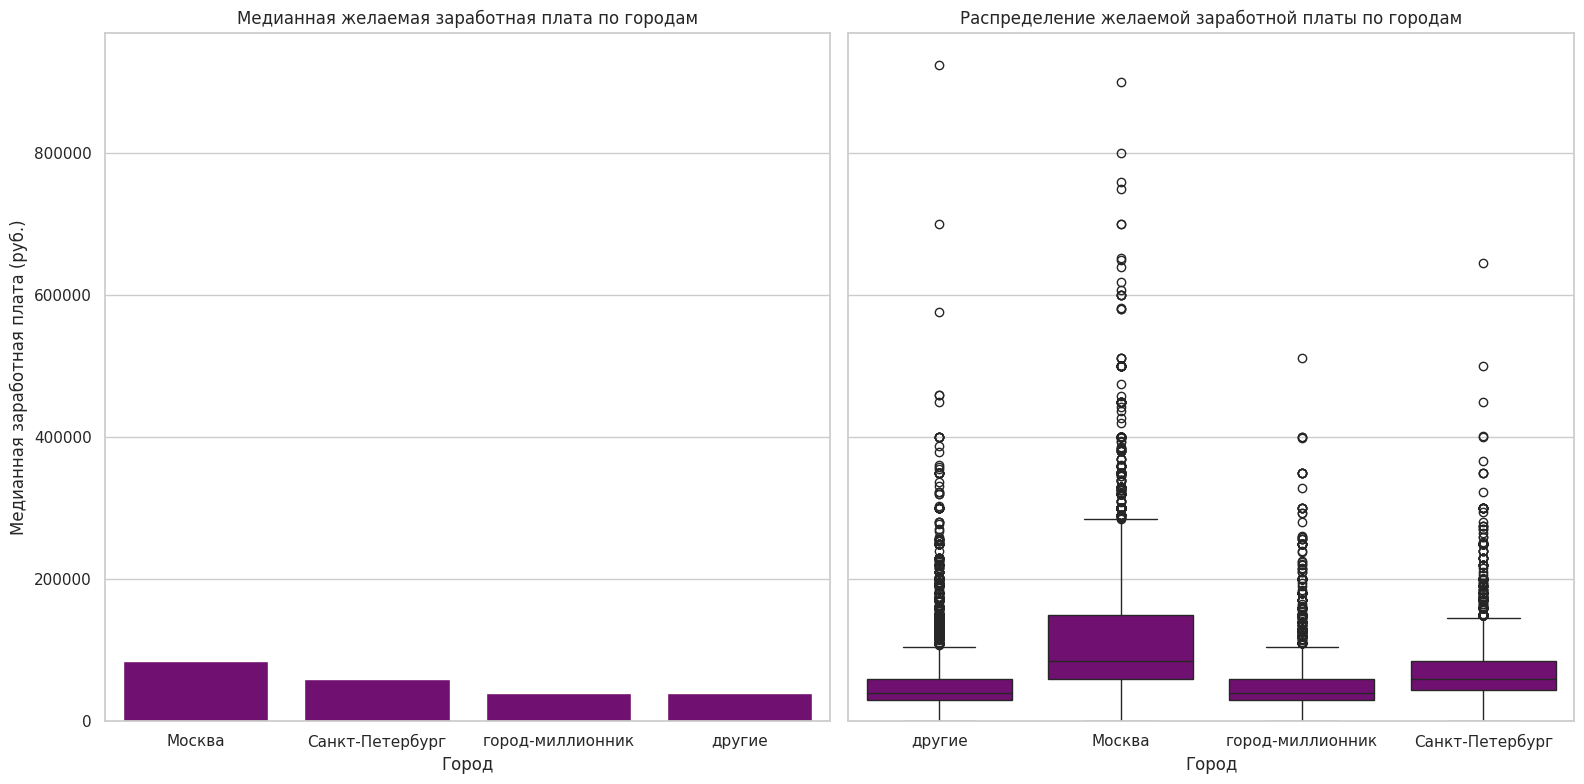

In [33]:
# Распределение желаемой заработной платы ("ЗП (руб)") в зависимости от города
# Фильтрация данных для желаемой заработной платы меньше 1 миллиона рублей
filtered_data = resume_data[resume_data['ЗП (руб)'] < 1e6]

# Расчет медианных значений желаемой заработной платы по городам
median_salary_by_city = filtered_data.groupby('Город')['ЗП (руб)'].median().reset_index()

# Создание фигуры и осей для двух субплотов
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Построение столбчатой диаграммы на первом субплоте
sns.barplot(x='Город', y='ЗП (руб)', data=median_salary_by_city, ax=axes[0], color='purple')
axes[0].set_title('Медианная желаемая заработная плата по городам')
axes[0].set_xlabel('Город')
axes[0].set_ylabel('Медианная заработная плата (руб.)')


# Построение коробчатой диаграммы на втором субплоте
sns.boxplot(x='Город', y='ЗП (руб)', data=filtered_data, ax=axes[1], color='purple')
axes[1].set_title('Распределение желаемой заработной платы по городам')
axes[1].set_xlabel('Город')
axes[1].set_ylabel('Желаемая заработная плата (руб.)')


# Отображение графиков
plt.tight_layout()
plt.show()


###Выводы:
Анализ медианных уровней зарплат по городам показывает, что Москва лидирует по уровню заработных плат, за ней следуют Санкт-Петербург, города-миллионники и другие регионы. Это подчёркивает тенденцию к более высоким зарплатам в крупных городах, отражая различия в экономических возможностях и стоимости жизни. Наблюдаемый в Москве и Санкт-Петербурге широкий размах зарплат указывает на большое разнообразие рабочих мест, от низкооплачиваемых до высококвалифицированных позиций. Таким образом, город проживания играет роль в определении потенциальной зарплаты, с крупными метрополиями, предоставляющими лучшие карьерные перспективы и высокие доходы.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

<ipython-input-37-0957ef7390ec>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(['Не готов', 'Готов'])


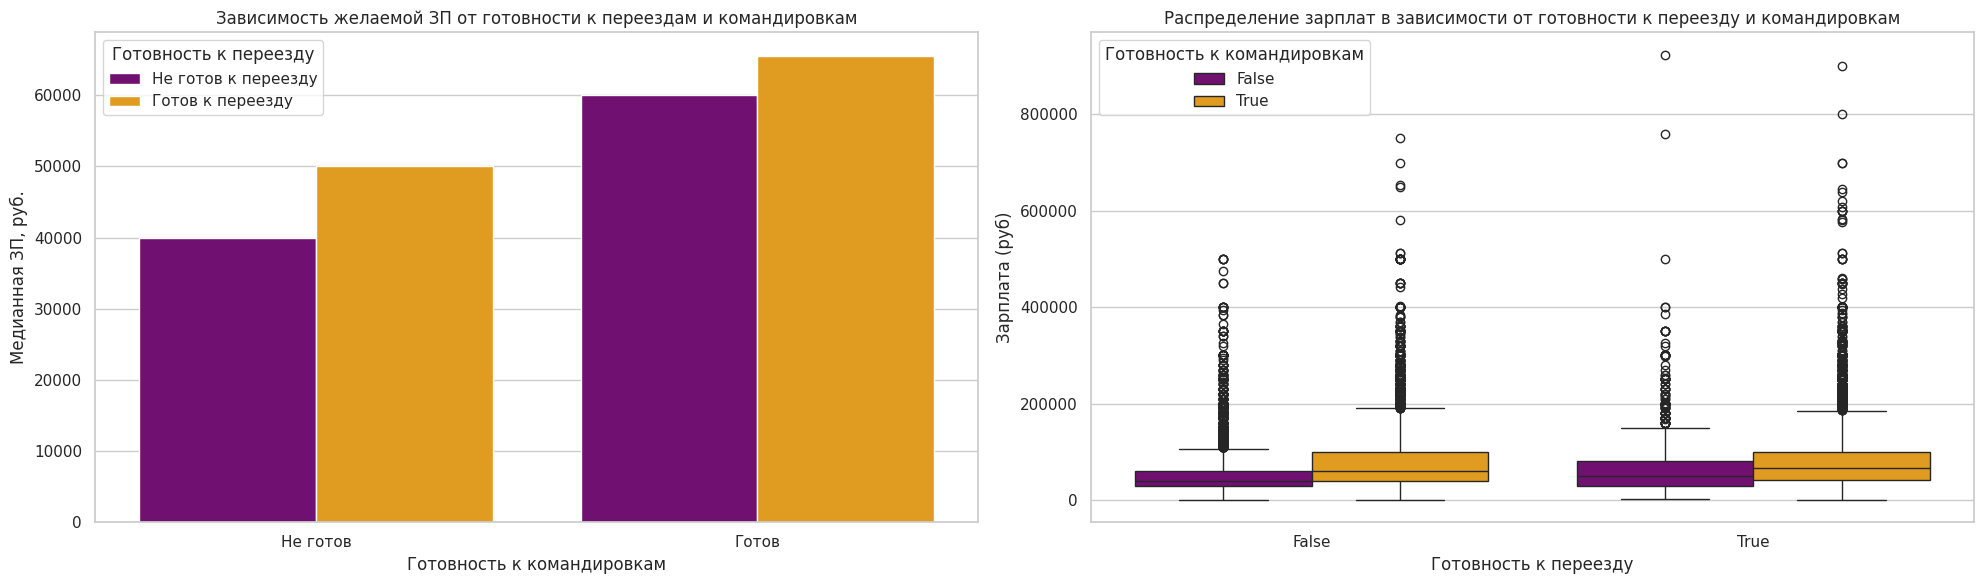

In [37]:
# Группировка отфильтрованных данных по признакам готовности к переезду и командировкам для столбчатой диаграммы
grouped_data = filtered_data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
filtered_data = filtered_data[filtered_data['ЗП (руб)'] < 1e6]

# Создание фигуры с двумя подграфиками
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Даём палитру
custom_palette = ['purple', 'orange']

# Строим многоуровневую столбчатую диаграмму
sns.barplot(
    x='Готовность к командировкам',
    y='ЗП (руб)',
    hue='Готовность к переезду',
    data=grouped_data,
    palette=custom_palette,
    ax=axs[0]
)
axs[0].set_title('Зависимость желаемой ЗП от готовности к переездам и командировкам')
axs[0].set_xlabel('Готовность к командировкам')
axs[0].set_ylabel('Медианная ЗП, руб.')
axs[0].set_xticklabels(['Не готов', 'Готов'])
handles, labels = axs[0].get_legend_handles_labels()
labels = ['Не готов к переезду', 'Готов к переезду']
axs[0].legend(handles, labels, title='Готовность к переезду')

# боксплот
sns.boxplot(
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    data=filtered_data,
    palette=custom_palette,
    ax=axs[1]
)
axs[1].set_title('Распределение зарплат в зависимости от готовности к переезду и командировкам')
axs[1].set_xlabel('Готовность к переезду')
axs[1].set_ylabel('Зарплата (руб)')

plt.tight_layout()
plt.show()


###Выводы:
Анализ данных о желаемой заработной плате и готовности кандидатов к переездам и командировкам показывает, что соискатели, открытые к перемещениям и командировкам, в среднем ожидают более высокую заработную плату. Это подтверждает предположение, что гибкость и мобильность кандидата являются важными качествами, которые могут быть оценены на рынке труда выше. Наибольшие зарплатные ожидания наблюдаются у соискателей, готовых к обоим видам мобильности, что может отражать как высокую квалификацию и специализацию таких кандидатов, так и их готовность брать на себя дополнительные обязанности и риски. Таким образом, готовность к переезду и командировкам может рассматриваться как значимый фактор, влияющий на уровень заработной платы, особенно в секторах с высокой динамикой и потребностью в мобильности персонала.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

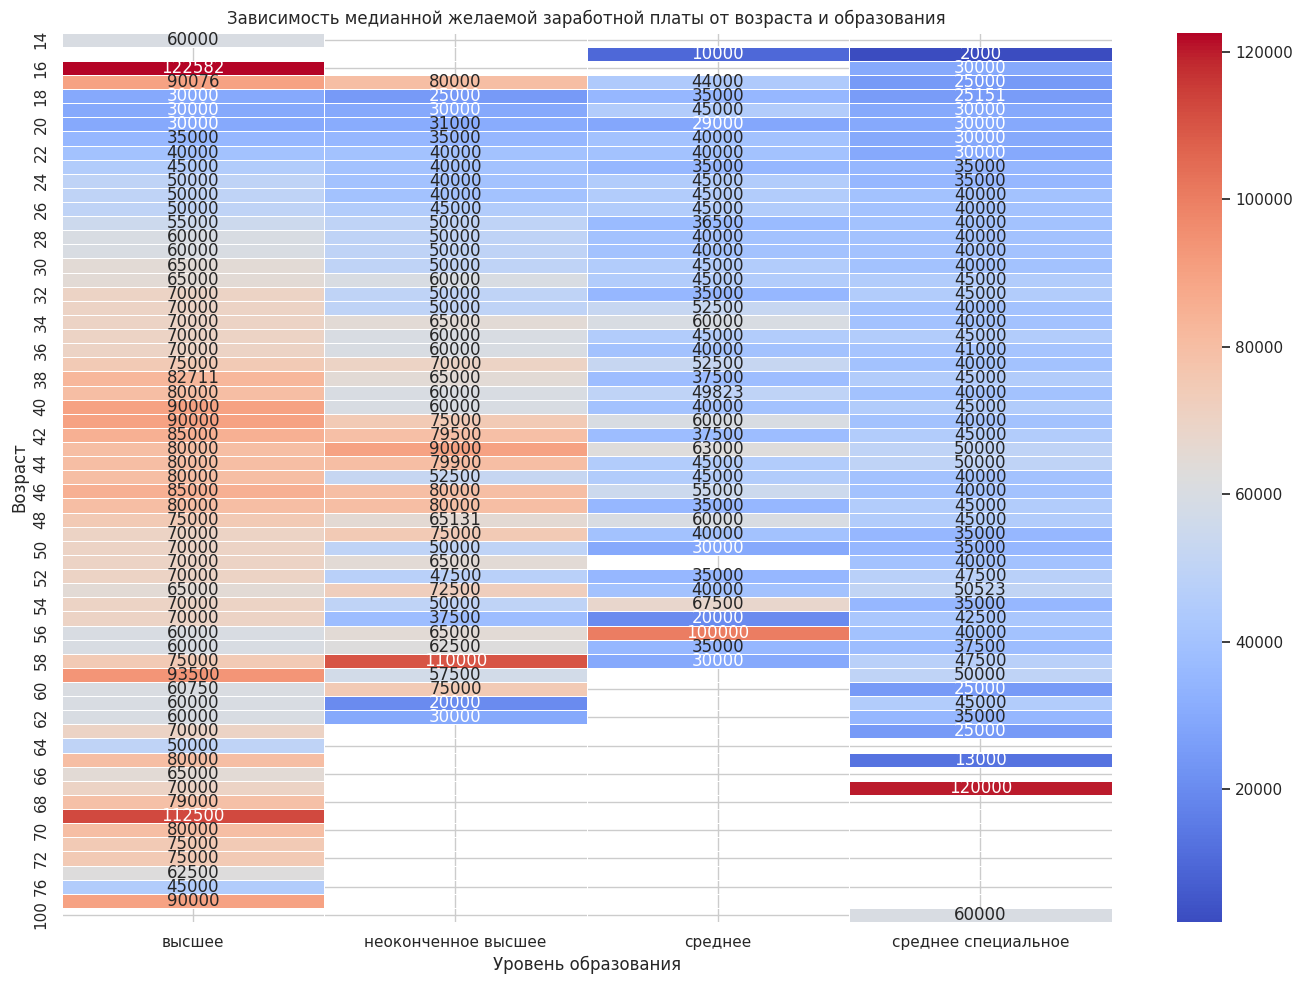

In [38]:
# Зависимость медианной желаемой заработной платы от возраста
pivot_table = resume_data.pivot_table(index='Возраст', columns='Образование', values='ЗП (руб)', aggfunc='median')

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Зависимость медианной желаемой заработной платы от возраста и образования')
plt.xlabel('Уровень образования')
plt.ylabel('Возраст')
plt.tight_layout()
plt.show()


###Выводы:
Анализ зарплатных ожиданий соискателей по различным критериям выявил важные тенденции. Во-первых, уровень образования имеет прямое влияние на медианную заработную плату: кандидаты с высшим образованием ожидают более высокую оплату труда по сравнению с соискателями, имеющими среднее специальное или общее среднее образование. Во-вторых, возрастные группы от 30 до 50 лет, вероятно, достигают пика своего карьерного развития и, соответственно, имеют наивысшие зарплатные ожидания. Это особенно заметно среди кандидатов с высшим образованием, где специализированные знания и накопленный опыт, вероятно, ведут к увеличению заработной платы. Молодые специалисты с высшим образованием часто сталкиваются с более низкими ожиданиями из-за отсутствия опыта, в то время как пожилые соискатели могут столкнуться с уменьшением ожиданий заработной платы, что может быть связано с переходом на пенсию или с уменьшением возможностей трудоустройства. Эти выводы подчеркивают важность уровня образования и возраста как ключевых факторов, влияющих на зарплатные ожидания на рынке труда.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

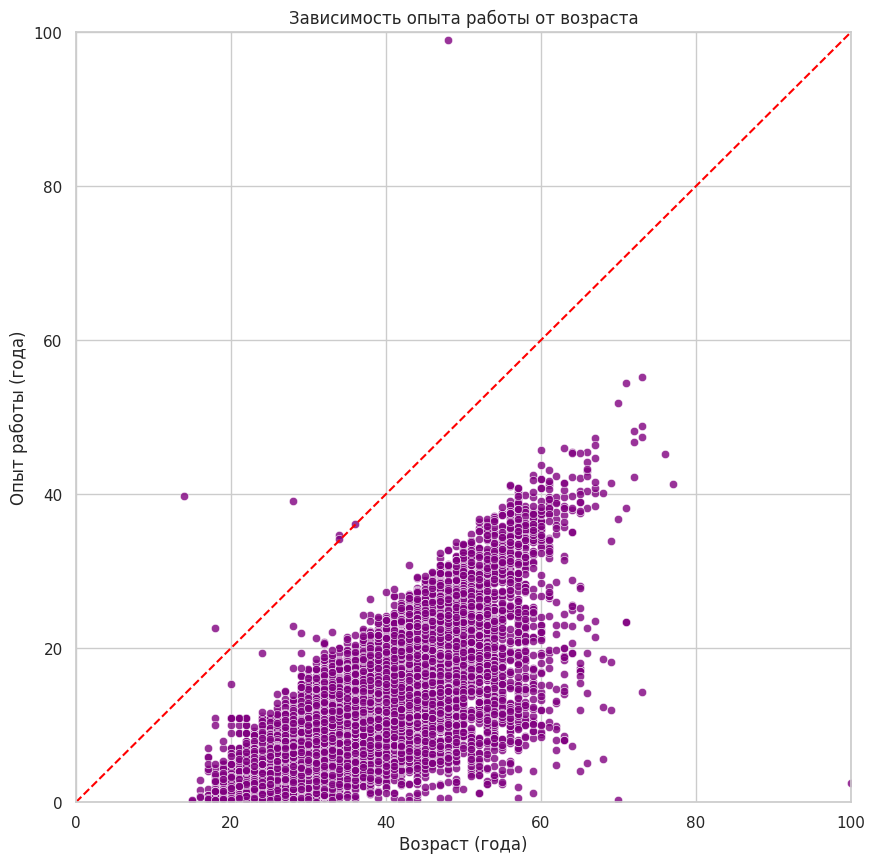

In [39]:
# Диаграмма рассеяния, показывающая зависимость опыта работы от возраста
# Перевод опыта работы из месяцев в года
resume_data['Опыт работы (года)'] = resume_data['Опыт работы (месяц)'] / 12

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Возраст', y='Опыт работы (года)', data=resume_data, alpha=0.8, color='purple')

# Добавление прямой, проходящей через точки (0, 0) и (100, 100)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')

plt.title('Зависимость опыта работы от возраста')
plt.xlabel('Возраст (года)')
plt.ylabel('Опыт работы (года)')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.show()



###Выводы:
* Существует положительная корреляция между возрастом и опытом работы — по мере увеличения возраста обычно увеличивается и опыт работы. Это соответствует ожиданиям, так как чем старше человек, тем больше у него было времени накопить опыт.

* На графике видны данные, которые подразумевают начало карьеры в районе 18-25 лет, что соответствует обычному возрасту окончания образовательных учреждений и входа в профессиональную жизнь.

* Несмотря на общую тенденцию, существуют исключения, когда у кандидатов сравнительно маленького возраста значительный опыт работы, что может объясняться ранним началом карьеры или включением в опыт работы стажировок и неформального опыта.

* С возрастом около 60 лет и выше количество точек уменьшается, что может указывать на выход людей на пенсию или переход в менее активные формы занятости.

* Потенциальные аномалии: Есть несколько точек, которые показывают очень высокий опыт работы у относительно молодых людей, что выглядит аномально. Это может быть связано с ошибками в данных или с особенностями их заполнения (например, если кандидаты включают в опыт работы время обучения или другую деятельность).

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


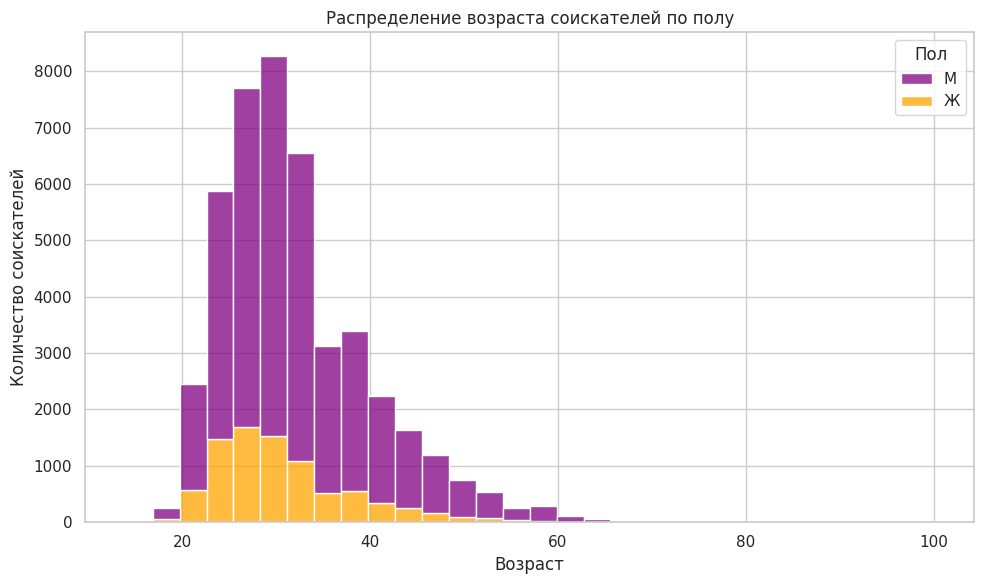

In [40]:
plt.figure(figsize=(10, 6))

sns.histplot(data=data, x='Возраст', hue='Пол', multiple='stack', palette=custom_palette, bins=30)
plt.title('Распределение возраста соискателей по полу')
plt.xlabel('Возраст')
plt.ylabel('Количество соискателей')
plt.tight_layout()
plt.show()

###Выводы:
* Уровень образования: Медианная заработная плата возрастает с уровнем образования. Соискатели с высшим образованием в среднем указывают на более высокие зарплатные ожидания по сравнению с теми, у кого образование неполное высшее, среднее или среднее специальное.

* Различия по полу: На всех уровнях образования медианная заработная плата мужчин выше, чем у женщин. Это согласуется с широко известным явлением гендерного разрыва в оплате труда. Наибольший разрыв в зарплатных ожиданиях между мужчинами и женщинами наблюдается у соискателей с высшим образованием. Это может отражать гендерные стереотипы в отношении высококвалифицированных должностей или неравенство в карьерных возможностях.


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [41]:
# @title Проверяем наличие дубликатов в данных.

def find_duplicates(data):
    duplicates = data[data.duplicated(subset=data.columns)]
    num_duplicates = duplicates.shape[0]

    if num_duplicates == 0:
        print('Дубликаты не найдены')
    else:
        print(f'Число явных дублей: {num_duplicates}')

    return duplicates

# Проверяем наличие дубликатов
data_duplicates = find_duplicates(resume_data)


Число явных дублей: 161


In [42]:
# Удаляем дублирующиеся строки
resume_data = resume_data.drop_duplicates()

# Проверяем
data_duplicates = find_duplicates(resume_data)

Дубликаты не найдены


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах.

In [43]:
# Находим пропуски
check_missing_values(resume_data)

Количество пропущенных значений по столбцам:
Опыт работы (года)                 168
Опыт работы (месяц)                168
ЗП категория                         6
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [44]:
# Удаление строк, где есть пропуски в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
resume_data = resume_data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Заполнение пропусков в столбце "Опыт работы (месяц)" медианным значением
median_experience = resume_data['Опыт работы (месяц)'].median()
resume_data['Опыт работы (месяц)'] = resume_data['Опыт работы (месяц)'].fillna(median_experience)

# Проверка на отсутствие пропусков в указанных столбцах
check_missing_values(resume_data)


Количество пропущенных значений по столбцам:
Опыт работы (года)    168
ЗП категория            6
dtype: int64


<ipython-input-44-1d32eabb1ac4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_data['Опыт работы (месяц)'] = resume_data['Опыт работы (месяц)'].fillna(median_experience)


In [45]:
# Расчет среднего значения в столбце "Опыт работы (месяц)" после заполнения пропусков
average_experience_after_filling = resume_data['Опыт работы (месяц)'].mean()
print(f"Результирующее среднее значение опыта работы (в месяцах) после заполнения пропусков: {average_experience_after_filling}")


Результирующее среднее значение опыта работы (в месяцах) после заполнения пропусков: 114.57811623785918


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [46]:
# Вычисление количества резюме с зарплатой выше 1 млн рублей или ниже 1 тыс. рублей
outliers_count = resume_data[(resume_data['ЗП (руб)'] > 1000000) | (resume_data['ЗП (руб)'] < 1000)].shape[0]
print(f"Количество выбросов: {outliers_count}")

# Удаление резюме с заработной платой выше 1 млн рублей или ниже 1 тыс. рублей
resume_data = resume_data[(resume_data['ЗП (руб)'] <= 1000000) & (resume_data['ЗП (руб)'] >= 1000)]

# Проверка размера данных после удаления
print(resume_data.shape)


Количество выбросов: 89
(44492, 25)


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [47]:
# Вычисление количества резюме, где опыт работы в годах превышает возраст соискателя
experience_outliers_count = resume_data[resume_data['Опыт работы (месяц)'] / 12 > resume_data['Возраст']].shape[0]

# Удаление таких резюме из данных
resume_data = resume_data[~(resume_data['Опыт работы (месяц)'] / 12 > resume_data['Возраст'])]

print(f"Количество найденных выбросов: {experience_outliers_count}")

Количество найденных выбросов: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

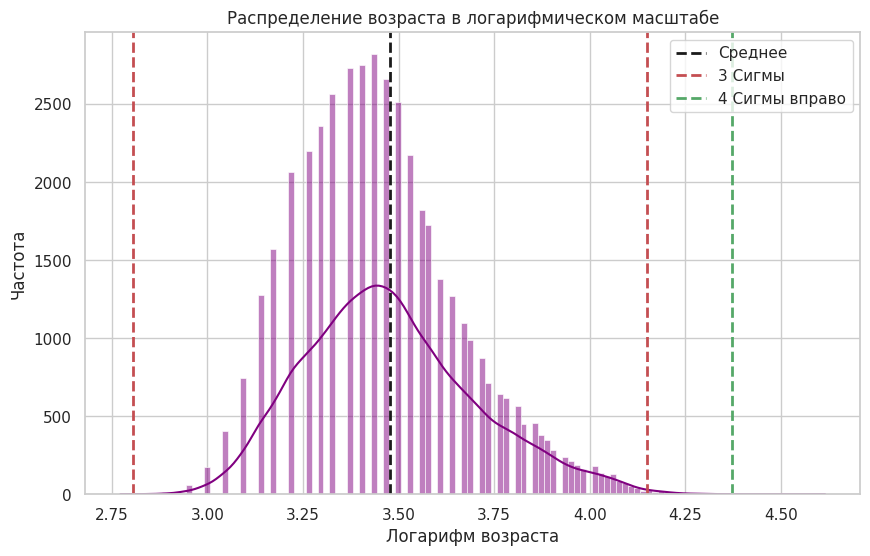

In [48]:
# Построение распределения возраста в логарифмическом масштабе
plt.figure(figsize=(10, 6))
log_age = np.log1p(resume_data['Возраст'])  # Логарифмирование возраста
histplot = sns.histplot(log_age, kde=True, color='purple')
histplot.axvline(log_age.mean(), color='k', linestyle='--', lw=2, label='Среднее')
histplot.axvline(log_age.mean() + 3*log_age.std(), color='r', linestyle='--', lw=2, label='3 Сигмы')
histplot.axvline(log_age.mean() - 3*log_age.std(), color='r', linestyle='--', lw=2)
histplot.axvline(log_age.mean() + 4*log_age.std(), color='g', linestyle='--', lw=2, label='4 Сигмы вправо')

plt.title('Распределение возраста в логарифмическом масштабе')
plt.xlabel('Логарифм возраста')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [49]:
# Нахождение z-отклонений для возраста
z_scores = (log_age - log_age.mean()) / log_age.std()
outliers = resume_data[(z_scores > 4) | (z_scores < -3)]  # Выбросы за пределами 3 сигм влево и 4 сигм вправо

# Вывод таблицы с выбросами и количество найденных выбросов
print("Таблица с выбросами по возрасту:")
print(outliers[['Возраст']])
print(f"Количество найденных выбросов: {outliers.shape[0]}")


Таблица с выбросами по возрасту:
       Возраст
31137       15
32950       15
33654      100
Количество найденных выбросов: 3



В представленной таблице выделены три выброса:

* Два соискателя с возрастом 15 лет, что значительно меньше среднего по выборке и может указывать на то, что это очень молодые люди, возможно еще не имеющие законного права на работу в полной мере.
* Один соискатель с возрастом 100 лет, что выглядит крайне необычно и скорее всего является ошибкой ввода данных или аномалией.

### Выводы:

* Возраст в 15 лет может быть допустим в датасете, если речь идет о стажировках или учебных вакансиях, но в целом такой возраст кажется необычным для рабочей силы.
* Возраст в 100 лет, вероятно, является ошибкой и должен быть исключен из анализа или подвергнут дополнительной проверке.
* Для точного определения значений, попадающих под категорию выбросов, необходимо рассчитать их, исходя из распределения возраста. Это поможет определить, какие возрастные значения являются реалистичными и могут быть включены в анализ, и какие следует исключить как неправдоподобные.

#BONUS. ИНТЕГРАЦИЯ ДАННЫХ О ЗАРПЛАТАХ В РАЗЛИЧНЫХ РЕГИОНАХ

Данное задание не является обязательным, но, выполнив его, вы получите возможность заработать дополнительные 3 балла.

**ЦЕЛЬ ЗАДАНИЯ:**
Расширить имеющийся датасет данными о средних зарплатах в различных регионах с целью улучшения прогноза уровня заработной платы для пользователей.

**ШАГИ ВЫПОЛНЕНИЯ:**

Подготовка данных:
* Загрузите данные о средних зарплатах в различных регионах. Эти данные могут быть доступны в открытых источниках статистики труда или экономических данных.
* Проверьте соответствие формата и структуры загруженных данных с имеющимся датасетом.

Интеграция данных:
* Объедините данные о зарплатах с основным датасетом, используя общий ключ, такой как регион или город.
* Убедитесь в корректности объединения данных и отсутствии пропусков или несоответствий.

Анализ новых данных:
* Проведите первичный анализ новых данных о зарплатах в различных регионах. Это может включать в себя вычисление средних, медианных и других статистических показателей.
* Визуализируйте данные, например, построив графики распределения заработных плат по регионам.

Оценка влияния:
* Оцените влияние новых данных о зарплатах на качество модели. Это можно сделать, например, сравнивая метрики качества модели до и после интеграции новых данных.

Данные о средних ЗП взяты из [Ростата](https://rosstat.gov.ru/storage/mediabank/Reg_Rus_Pokaz_2023.htm)

In [51]:
# @title Подготовка данных:

# Загрузка данных
salary_data = pd.read_csv('/content/drive/MyDrive/Prod_Py/Stat.csv', sep=';')

# Переименовываем первый столбец в "Город"
salary_data.rename(columns={salary_data.columns[0]: 'Город'}, inplace=True)

# Преобразуем названия городов, удаляя "г. "
salary_data['Город'] = salary_data['Город'].str.replace('г. ', '')

# Удаление всех строк, содержащих "округ", кроме "автономный"
salary_data = salary_data[~salary_data['Город'].str.contains("округ", case=False) | salary_data['Город'].str.contains("автономный", case=False)]

# Удаление строки с индексом 0, если это еще необходимо
# Предполагается, что индексация может быть сброшена после предыдущих операций, поэтому следует проверить, нужен ли этот шаг
if 0 in salary_data.index:
    salary_data = salary_data.drop(index=0)

# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск',
                  'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь',
                  'Воронеж', 'Волгоград']

# Функции для определения новых признаков Город
salary_data['Город'] = salary_data['Город'].apply(
    lambda x: x.split(',')[0].strip()
    if x.split(',')[0].strip() in ['Москва', 'Санкт-Петербург']
    else ('город-миллионник'
          if x.split(',')[0].strip() in million_cities
          else 'другие'))


# Определяем столбец для переименования в "Средняя ЗП по региону" и удаляем пропуски
column_name = salary_data.columns[6]  # Предполагая, что это правильный столбец
salary_data = salary_data.dropna(subset=[column_name]).rename(columns={column_name: 'Средняя ЗП по региону'})

# Удаление пробелов и замена запятых на точки
salary_data['Средняя ЗП по региону'] = salary_data['Средняя ЗП по региону'].str.replace('\xa0', '').str.replace(',', '.').astype(float)



# Оставляем только необходимые столбцы
salary_data = salary_data[['Город', 'Средняя ЗП по региону']]

# Создание сводной таблицы для категорий городов и средней зарплаты по регионам
pivot_table = salary_data.pivot_table(index='Город', values='Средняя ЗП по региону', aggfunc='mean').reset_index()


# Округление средней зарплаты до ближайших тысяч
pivot_table['Средняя ЗП по региону'] = (np.round(pivot_table['Средняя ЗП по региону'] / 1000) * 1000).astype(int)


pivot_table

,Город,Средняя ЗП по региону
0,Москва,126000
1,Санкт-Петербург,87000
2,другие,55000


In [52]:
# Подготавливаем resume_data

# Заменяем названия городов-миллионников на "другие" в столбце "Город"
resume_data['Город'] = resume_data['Город'].apply(lambda x: "другие" if x in ['город-миллионник'] else x )
resume_data.head()

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Готовность к переезду,...,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб),ЗП категория,Опыт работы (года)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,False,...,False,False,True,True,True,True,True,29000.0,20000-40000,16.833333
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,высшее,М,60,233.0,False,...,False,False,True,True,True,True,False,40000.0,40000-60000,19.416667
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,False,...,False,False,True,False,False,False,False,20000.0,20000-40000,10.250000
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,высшее,М,38,225.0,False,...,False,False,False,False,True,True,False,100000.0,100000-120000,18.750000
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,False,...,False,False,True,False,False,False,False,140000.0,140000-160000,5.583333


In [53]:
# @title Интеграция данных

# Объединяем данные, используя общий ключ "Город"
merged_data = pd.merge(resume_data, pivot_table, on='Город', how='left')

# Удаление столбцов "Опыт работы (года)" и "Средняя ЗП по региону" из resume_data
merged_data = merged_data.drop(columns=['Опыт работы (года)', 'ЗП категория'])

# Проверяем на наличие пропусков после объединения
missing_values = merged_data.isnull().sum()
print("Пропущенные значения после объединения:\n", missing_values)


Пропущенные значения после объединения:
 Ищет работу на должность:          0
Последнее/нынешнее место работы    0
Последняя/нынешняя должность       0
Обновление резюме                  0
Авто                               0
Образование                        0
Пол                                0
Возраст                            0
Опыт работы (месяц)                0
Готовность к переезду              0
Готовность к командировкам         0
Город                              0
полная занятость                   0
частичная занятость                0
проектная работа                   0
волонтерство                       0
стажировка                         0
полный день                        0
сменный график                     0
гибкий график                      0
удаленная работа                   0
вахтовый метод                     0
ЗП (руб)                           0
Средняя ЗП по региону              0
dtype: int64


In [54]:
# Убеждаемся в корректности объединения
unique_salaries = merged_data['Средняя ЗП по региону'].unique()

# Вывод уникальных значений
print(unique_salaries)

[ 55000 126000  87000]


In [55]:
merged_data.tail()

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Готовность к переезду,...,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб),Средняя ЗП по региону
44480,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,высшее,М,30,91.0,True,...,False,False,False,True,False,False,True,False,50000.0,55000
44481,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,высшее,М,27,84.0,True,...,True,False,False,True,True,True,True,False,39000.0,55000
44482,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-04-09,Не указано,высшее,Ж,48,257.0,True,...,False,False,False,True,False,False,True,False,40000.0,55000
44483,Контент-менеджер,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,высшее,М,24,46.0,False,...,False,False,False,False,False,False,True,False,20000.0,55000
44484,Руководитель проекта,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,2018-07-05,Не указано,высшее,М,38,190.0,False,...,False,False,False,True,False,False,False,False,120000.0,126000


In [56]:
# @title Анализ новых данных:
# Вычисление основных статистических показателей для "Средняя ЗП по региону"
salary_stats = merged_data['Средняя ЗП по региону'].describe()

# Вывод статистических показателей
print(salary_stats)


count     44485.000000
mean      84927.908284
std       33036.268841
min       55000.000000
25%       55000.000000
50%       55000.000000
75%      126000.000000
max      126000.000000
Name: Средняя ЗП по региону, dtype: float64


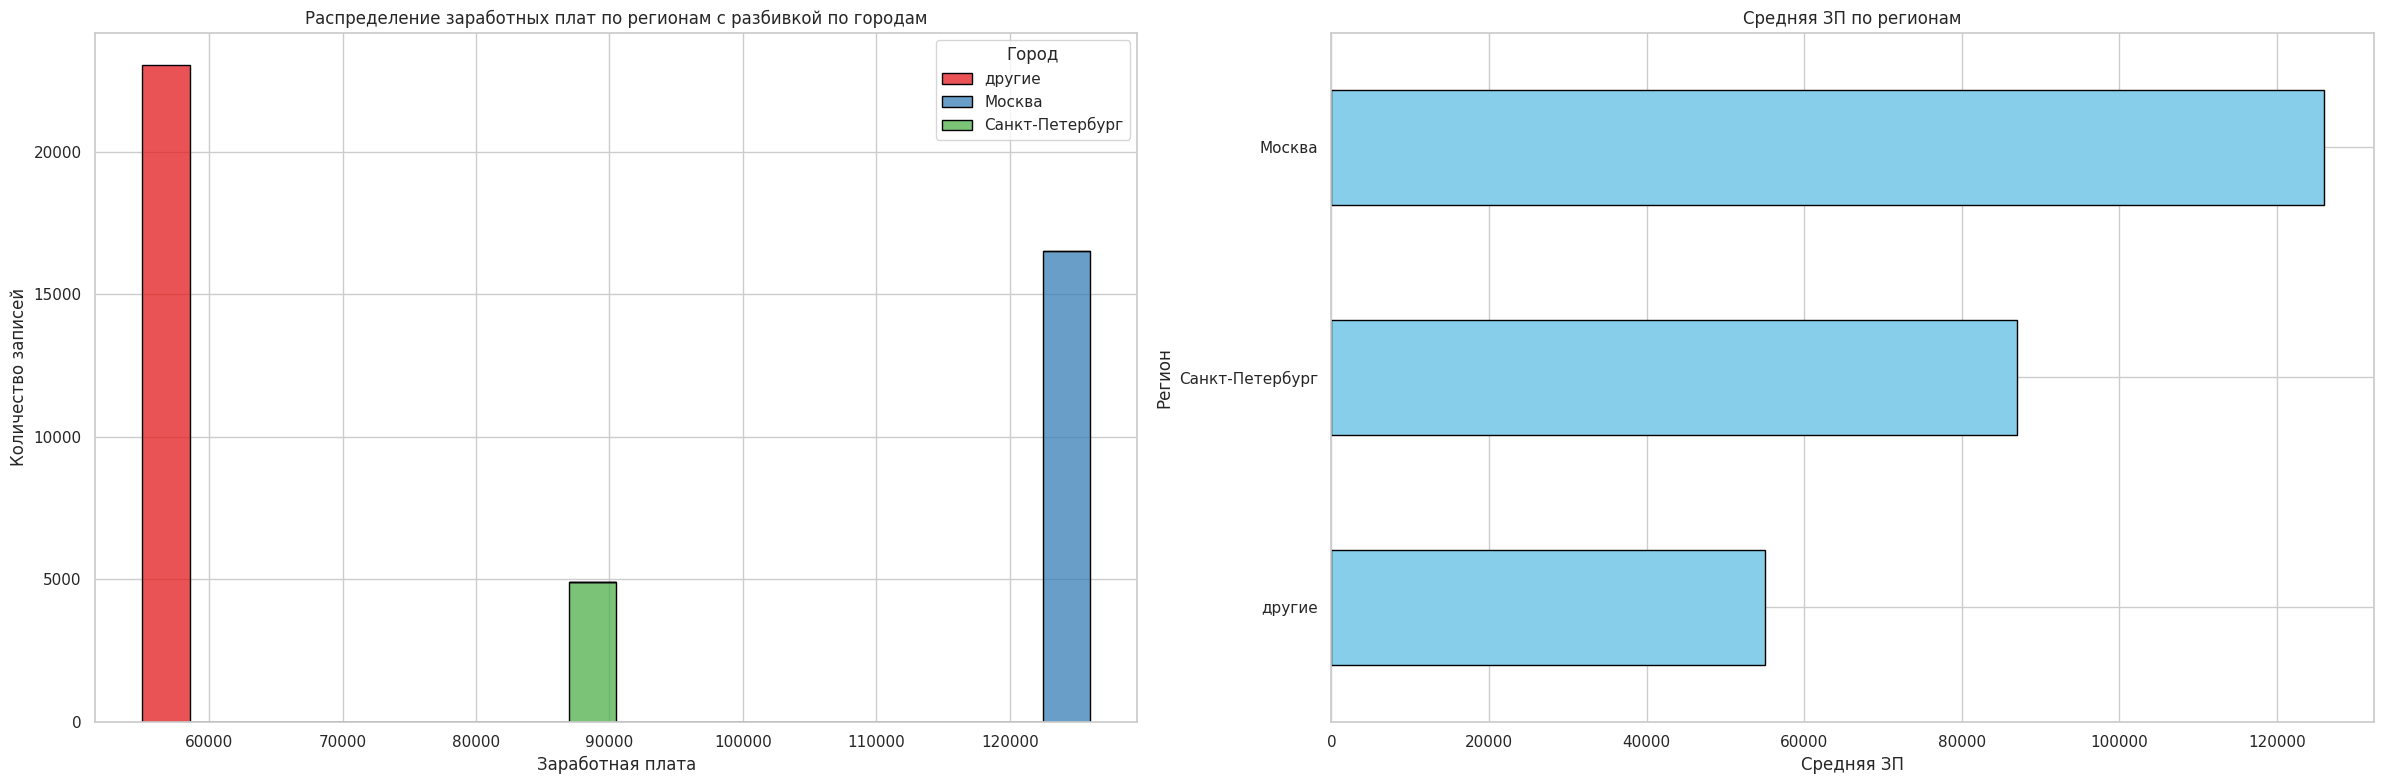

In [57]:
# Настройка размера и стиля графиков
plt.figure(figsize=(24, 8))
sns.set(style="whitegrid")

# Первый график - гистограмма с разбивкой по городам
plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, первый график
sns.histplot(data=merged_data, x='Средняя ЗП по региону', hue='Город', multiple='stack', bins=20, palette='Set1', edgecolor='black')
plt.title('Распределение заработных плат по регионам с разбивкой по городам')
plt.xlabel('Заработная плата')
plt.ylabel('Количество записей')

# Второй график - график средней зарплаты по регионам
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, второй график
merged_data.groupby('Город')['Средняя ЗП по региону'].mean().sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Средняя ЗП по регионам')
plt.xlabel('Средняя ЗП')
plt.ylabel('Регион')

# Отображаем графики
plt.tight_layout()
plt.show()


### Выводы:

* Есть явное разделение между заработными платами в столичных регионах и остальной частью страны.
* В Москве заработные платы значительно выше, что может быть связано с большей концентрацией высокооплачиваемых рабочих мест и головных офисов компаний.
* На гистограмме видно, что большинство заработных плат в регионах сосредоточено в низшем диапазоне, что указывает на меньшие возможности трудоустройства на высокооплачиваемые должности.
